## Visualize and compare results

This nodebook is to compare the results of 
- our NN implementation using cross validation and **grid search**
- our NN implementation using cross validation and **local search**
- an existing NN implementation MLPClassifier with default parameters using cross validation
- RandomForest with robust scaling, holdout and no feature selection (which is the best classification model from the previous assignment)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the results

In [2]:
cv_grid_search_results = pd.read_csv('./results/cv_grid_search_results.csv')
cv_grid_search_results.head()

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Training Time,dataset
0,[5],tanh,0.0100,64,10,0.896471,1.121827,cong_voting
1,[5],tanh,0.0010,64,10,0.287731,1.068501,cong_voting
2,[5],tanh,0.0001,64,10,0.212773,0.878100,cong_voting
3,[5],relu,0.0100,64,10,0.890756,0.844678,cong_voting
4,[5],relu,0.0010,64,10,0.304706,0.628949,cong_voting


In [3]:
cv_local_search_results = pd.read_csv('./results/cv_local_search_results.csv')
cv_grid_search_results.head()

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Training Time,dataset
0,[5],tanh,0.0100,64,10,0.896471,1.121827,cong_voting
1,[5],tanh,0.0010,64,10,0.287731,1.068501,cong_voting
2,[5],tanh,0.0001,64,10,0.212773,0.878100,cong_voting
3,[5],relu,0.0100,64,10,0.890756,0.844678,cong_voting
4,[5],relu,0.0010,64,10,0.304706,0.628949,cong_voting


In [4]:
mlp_results = pd.read_csv('./results/MLP.csv')
mlp_results = mlp_results.drop(mlp_results.columns[0], axis=1)
mlp_results = mlp_results.replace('congression_voting', 'cong_voting')
mlp_results.head()

,method,dataset,Average Accuracy,Average Training Time
0,MLP,wine_quality,0.515010,0.000998
1,MLP,cong_voting,0.856765,0.000000
2,MLP,bank_marketing,0.846603,0.000000


In [5]:
random_forest_results = pd.read_csv('./results/traditional_results.csv')
random_forest_results = random_forest_results.replace('congression_voting', 'cong_voting')
random_forest_results.head()

,method,dataset,Average Accuracy,Average Training Time
0,RandomForest,wine_quality,0.862107,2.765367
1,RandomForest,cong_voting,0.954380,0.102292
2,RandomForest,bank_marketing,0.932230,3.748086


### Grid search results

In [6]:
cv_grid_search_results['Num Hidden Layers'] = cv_grid_search_results['Hidden Layer Sizes'].apply(lambda x: len(eval(x)))
#cv_grid_search_results = cv_grid_search_results.rename(columns={'Training Time': 'Average Training Time'})

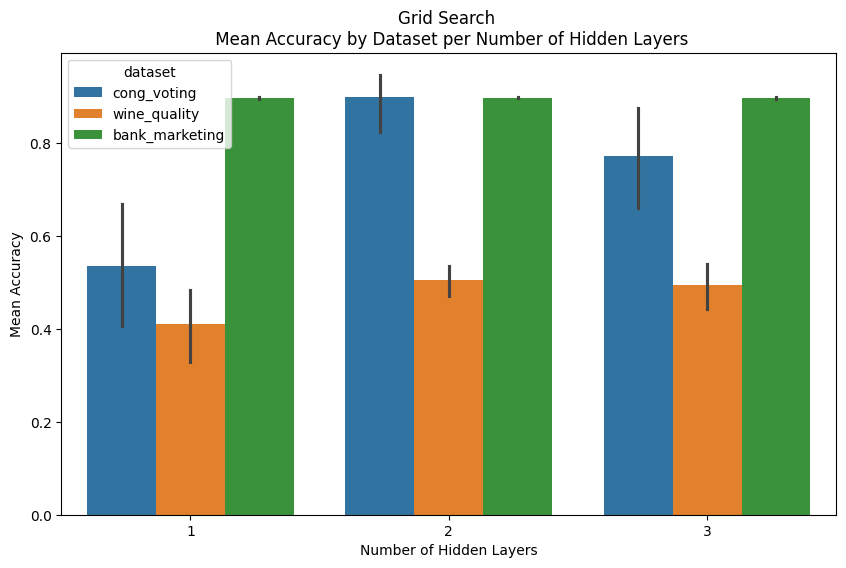

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Num Hidden Layers', y='Average Accuracy', hue='dataset', data=cv_grid_search_results)

plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Accuracy')
plt.title('Grid Search \n Mean Accuracy by Dataset per Number of Hidden Layers')
plt.show()
plt.savefig('results_plots/gridsearch_accuracy_dataset_hiddenlayers.png')

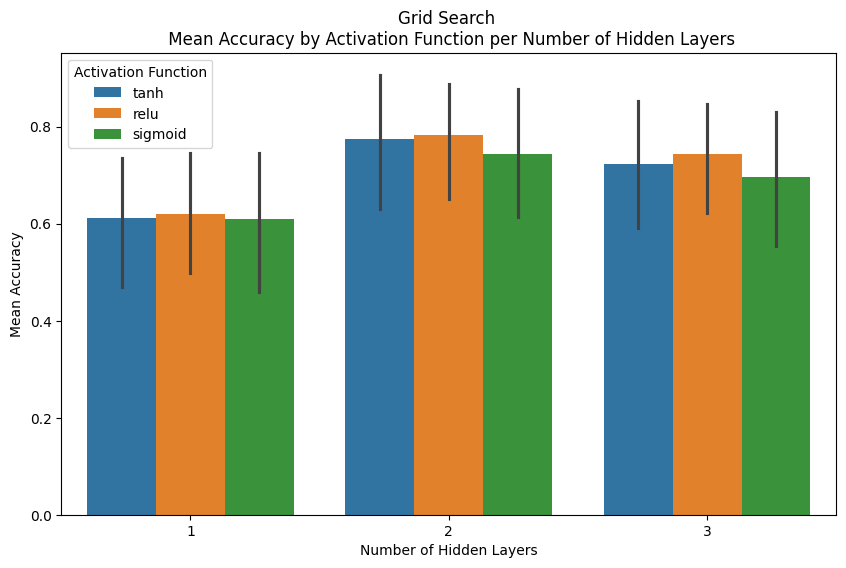

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Num Hidden Layers', y='Average Accuracy', hue='Activation Function', data=cv_grid_search_results)

plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Accuracy')
plt.title('Grid Search \n Mean Accuracy by Activation Function per Number of Hidden Layers')

plt.show()
plt.savefig('results_plots/gridsearch_accuracy_activation_hiddenlayers.png')

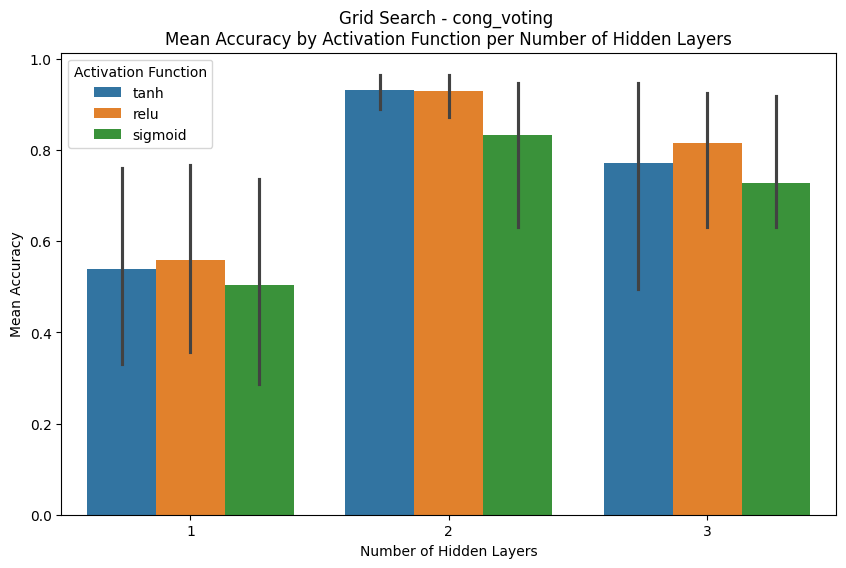

<Figure size 640x480 with 0 Axes>

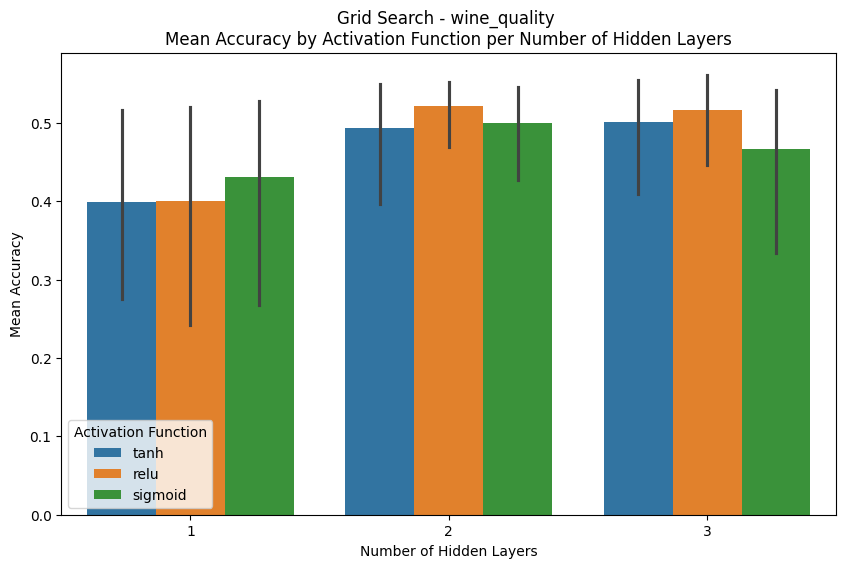

<Figure size 640x480 with 0 Axes>

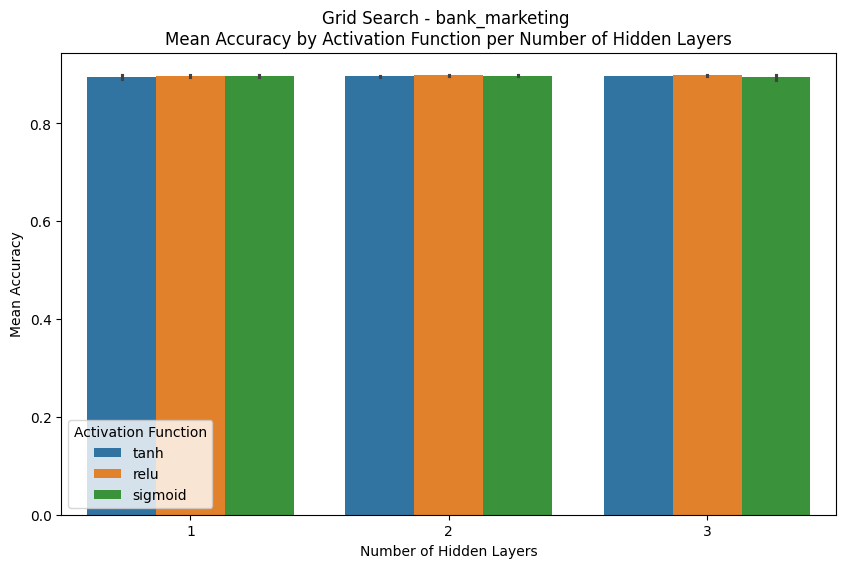

<Figure size 640x480 with 0 Axes>

In [9]:
# This is similar as the one above but here it's per dataset

datasets = cv_grid_search_results['dataset'].unique()

for dataset in datasets:
    plt.figure(figsize=(10, 6))
    
    subset_data = cv_grid_search_results[cv_grid_search_results['dataset'] == dataset]

    sns.barplot(x='Num Hidden Layers', y='Average Accuracy', hue='Activation Function', data=subset_data)
    
    plt.xlabel('Number of Hidden Layers')
    plt.ylabel('Mean Accuracy')
    plt.title(f'Grid Search - {dataset} \nMean Accuracy by Activation Function per Number of Hidden Layers')
    
    plt.show()
    plt.savefig(f'results_plots/gridsearch_accuracy_activation_hiddenlayers_{dataset}.png')


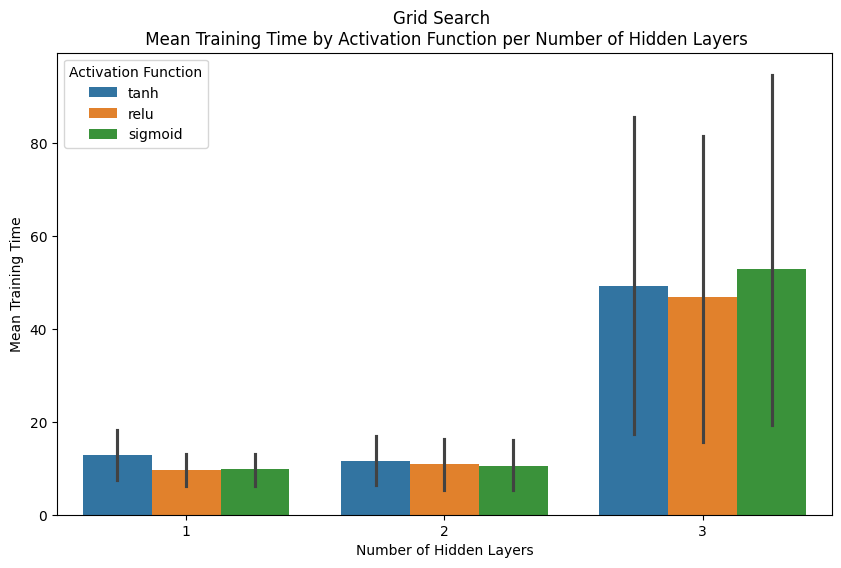

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Num Hidden Layers', y='Average Training Time', hue='Activation Function', data=cv_grid_search_results)

plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Training Time')
plt.title('Grid Search \n Mean Training Time by Activation Function per Number of Hidden Layers')

plt.show()
plt.savefig(f'results_plots/gridsearch_time_activation_hiddenlayers_{dataset}.png')

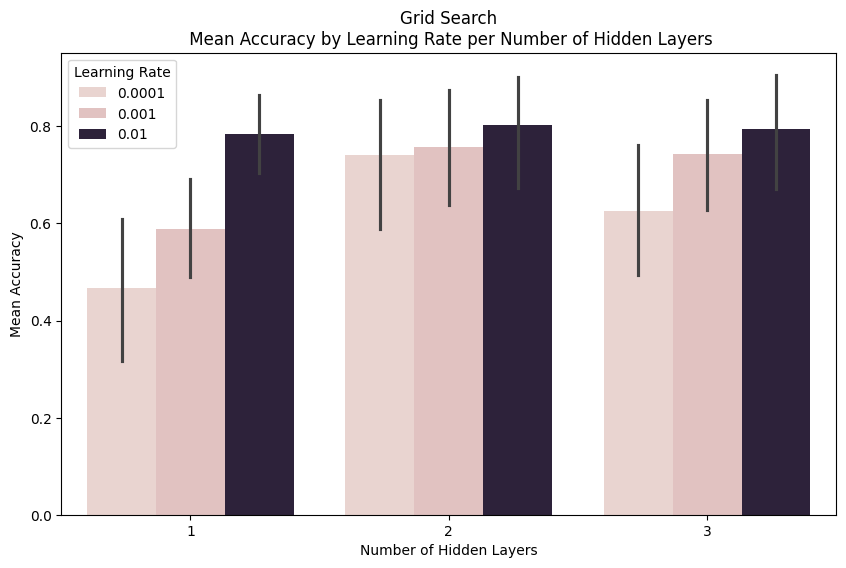

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Num Hidden Layers', y='Average Accuracy', hue='Learning Rate', data=cv_grid_search_results)

plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Accuracy')
plt.title('Grid Search\n Mean Accuracy by Learning Rate per Number of Hidden Layers')

plt.show()
plt.savefig('results_plots/gridsearch_accuracy_learning_hiddenlayers.png')

### Local search results

In [12]:
cv_local_search_results['Num Hidden Layers'] = cv_local_search_results['Hidden Layer Sizes'].apply(lambda x: len(eval(x)))

In [13]:
cv_local_search_results.head()

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Average Training Time,dataset,Num Hidden Layers
0,"[25, 30]",tanh,0.014512,64,11,0.537055,1.192598,wine_quality,2
1,"[24, 29]",relu,0.022347,128,12,0.534167,0.866983,wine_quality,2
2,"[24, 31]",relu,0.020818,64,12,0.539942,1.399698,wine_quality,2
3,"[24, 31]",sigmoid,0.029520,32,11,0.547642,2.171049,wine_quality,2
4,"[25, 32]",relu,0.039251,32,10,0.536092,2.244884,wine_quality,2


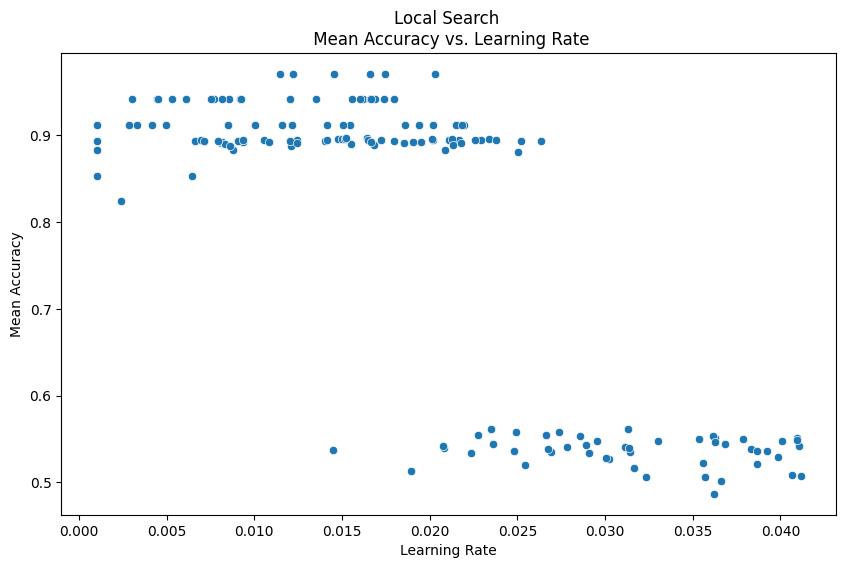

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Learning Rate', y='Average Accuracy', data=cv_local_search_results)

plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy')
plt.title('Local Search \n Mean Accuracy vs. Learning Rate')

plt.show()
plt.savefig('results_plots/localsearch_accuracy_learning.png')

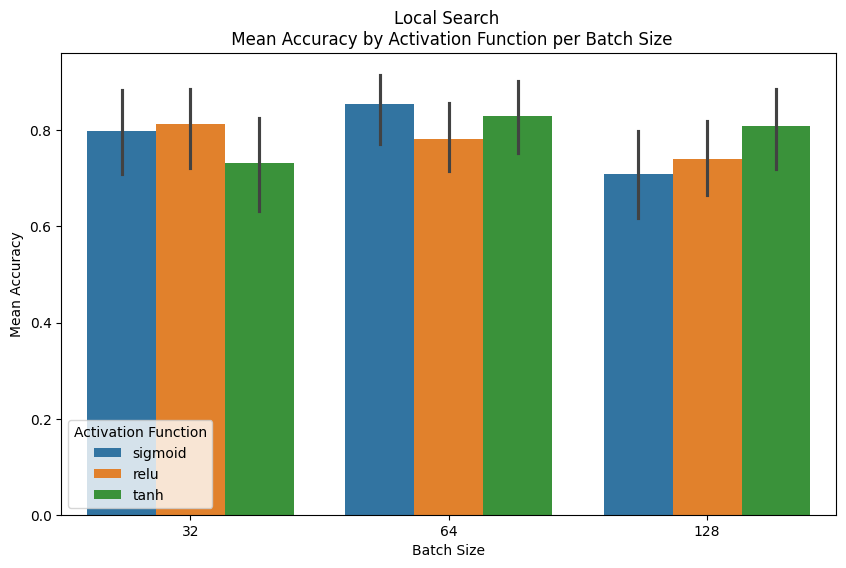

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Batch Size', y='Average Accuracy', hue='Activation Function', data=cv_local_search_results)

plt.xlabel('Batch Size')
plt.ylabel('Mean Accuracy')
plt.title('Local Search \n Mean Accuracy by Activation Function per Batch Size')

plt.show()
plt.savefig('results_plots/localsearch_accuracy_activation_batch.png')

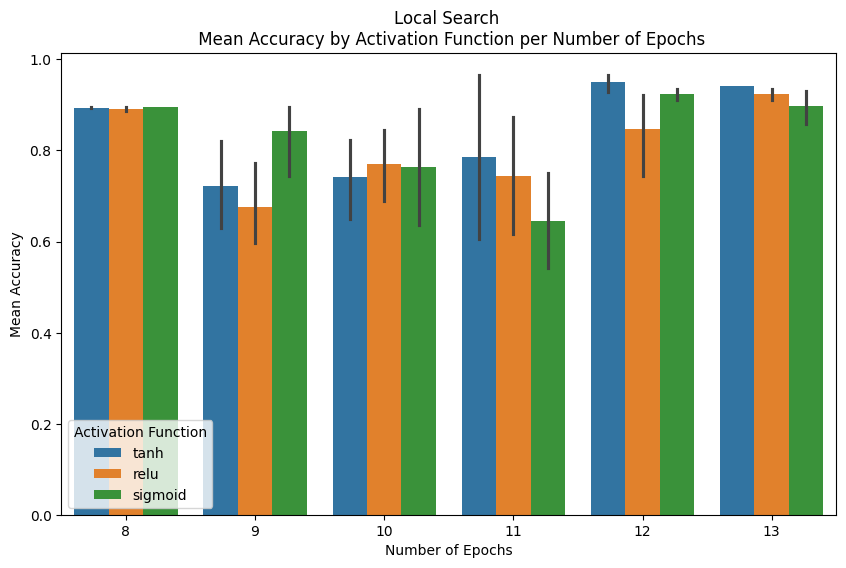

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Number of Epochs', y='Average Accuracy', hue='Activation Function', data=cv_local_search_results)

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Accuracy')
plt.title('Local Search \n Mean Accuracy by Activation Function per Number of Epochs')

plt.show()
plt.savefig('results_plots/localsearch_accuracy_activation_epochs.png')

### Compare local and grid search results

In [17]:
cv_grid_search_results['method'] = 'Own NN Grid Search'
cv_local_search_results['method'] = 'Own NN Local Search'

combined_NN_results = pd.concat([cv_grid_search_results, cv_local_search_results])

combined_NN_results = combined_NN_results.reset_index(drop=True)

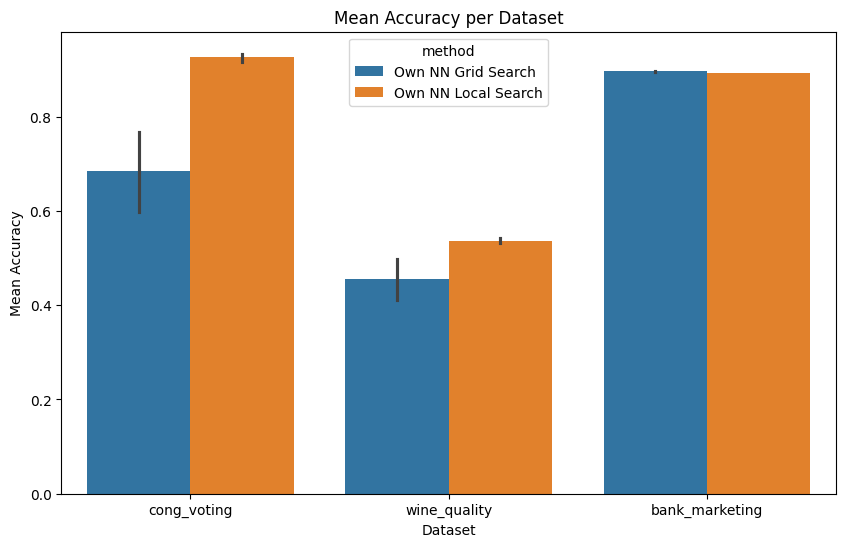

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(10, 6))

sns.barplot(x='dataset', y='Average Accuracy', hue='method', data=combined_NN_results)

plt.xlabel('Dataset')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy per Dataset')

plt.show()
plt.savefig('results_plots/local_grid_accuracy.png')

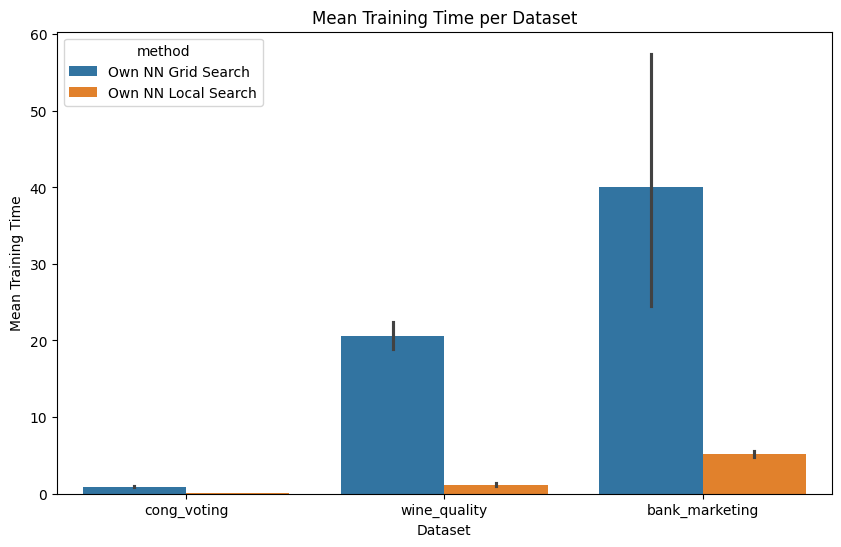

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 6))

sns.barplot(x='dataset', y='Average Training Time', hue='method', data=combined_NN_results)

plt.xlabel('Dataset')
plt.ylabel('Mean Training Time')
plt.title('Mean Training Time per Dataset')

plt.show()
plt.savefig('results_plots/local_grid_time.png')

In [20]:
best_local_search_indices = cv_local_search_results.groupby('dataset')['Average Accuracy'].idxmax()
best_local_search = cv_local_search_results.loc[best_local_search_indices]
best_local_search

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Average Training Time,dataset,Num Hidden Layers,method
144,"[26, 31]",sigmoid,0.015217,32,10,0.896813,7.707599,bank_marketing,2,Own NN Local Search
64,"[24, 32]",tanh,0.012187,64,12,0.970588,0.051132,cong_voting,2,Own NN Local Search
10,"[24, 31]",relu,0.031303,128,10,0.562079,1.284953,wine_quality,2,Own NN Local Search


In [21]:
best_grid_search_indices = cv_grid_search_results.groupby('dataset')['Average Accuracy'].idxmax()
best_grid_search = cv_grid_search_results.loc[best_grid_search_indices]
best_grid_search

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Average Training Time,dataset,Num Hidden Layers,method
78,[5],sigmoid,0.01,64,10,0.899545,13.074883,bank_marketing,1,Own NN Grid Search
18,"[25, 30]",tanh,0.01,64,10,0.965546,1.279610,cong_voting,2,Own NN Grid Search
66,"[20, 25, 30]",relu,0.01,64,10,0.561176,19.611423,wine_quality,3,Own NN Grid Search


In [22]:
mlp_results

,method,dataset,Average Accuracy,Average Training Time
0,MLP,wine_quality,0.515010,0.000998
1,MLP,cong_voting,0.856765,0.000000
2,MLP,bank_marketing,0.846603,0.000000


In [23]:
random_forest_results

,method,dataset,Average Accuracy,Average Training Time
0,RandomForest,wine_quality,0.862107,2.765367
1,RandomForest,cong_voting,0.954380,0.102292
2,RandomForest,bank_marketing,0.932230,3.748086


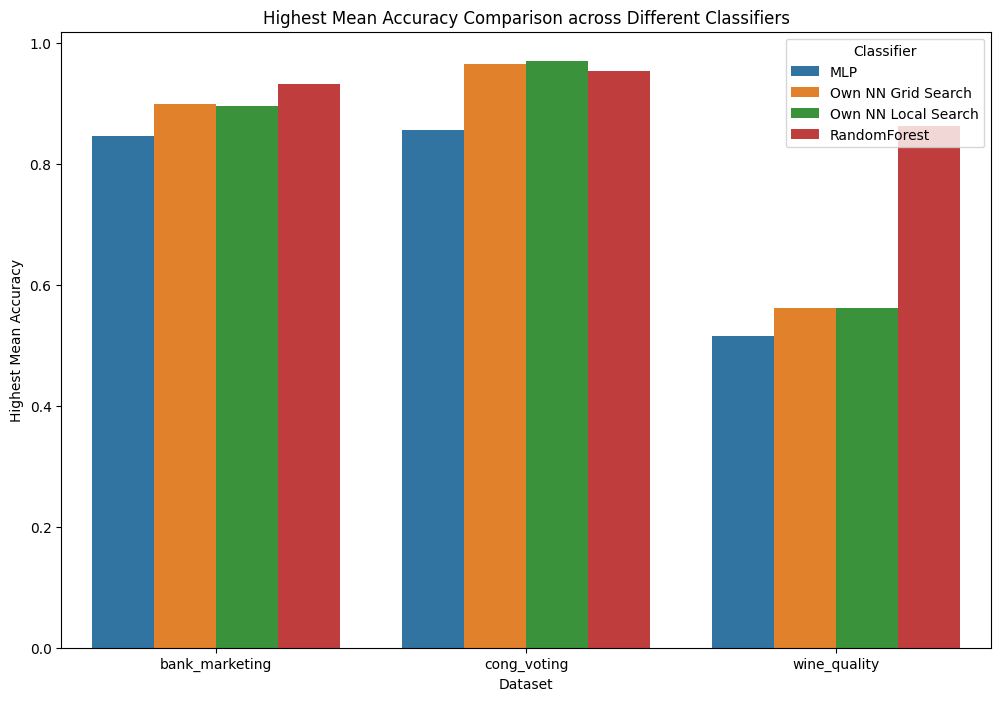

<Figure size 640x480 with 0 Axes>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_results = pd.concat([mlp_results, cv_local_search_results, cv_grid_search_results, random_forest_results])

combined_results = combined_results.reset_index(drop=True)
combined_results = combined_results.reset_index(drop=True)

max_accuracy_indices = combined_results.groupby(['dataset', 'method'])['Average Accuracy'].idxmax()

max_accuracy_rows = combined_results.loc[max_accuracy_indices]

plt.figure(figsize=(12, 8))

sns.barplot(x='dataset', y='Average Accuracy', hue='method', data=max_accuracy_rows)

plt.xlabel('Dataset')
plt.ylabel('Highest Mean Accuracy')
plt.title('Highest Mean Accuracy Comparison across Different Classifiers')
plt.legend(title='Classifier')

plt.show()
plt.savefig('results_plots/highest_accuracy_all.png')


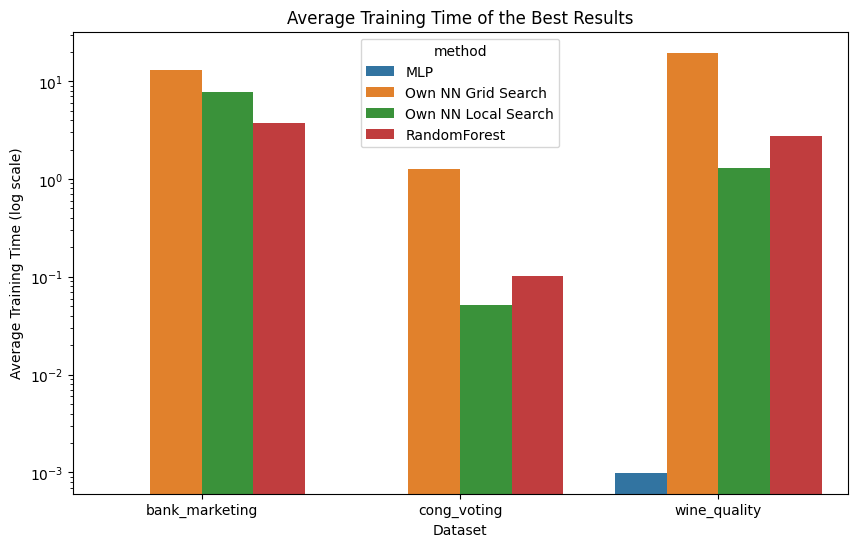

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(10, 6))

sns.barplot(x='dataset', y='Average Training Time', hue='method', data=max_accuracy_rows)

plt.yscale('log') 

plt.xlabel('Dataset')
plt.ylabel('Average Training Time (log scale)')
plt.title('Average Training Time of the Best Results')

plt.show()
plt.savefig('results_plots/highest_accuracy_time_all.png')